# Подключение библиотек

In [ ]:
from IPython import get_ipython
import numpy as np
import pandas as pd
import requests
import re
from csv import writer

In [ ]:
from google.colab import files 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR='/content/drive/My Drive/Базы/'

# Базовые функции

In [ ]:
base_url = "https://api.themoviedb.org/3/"
TOKEN = 'api_key=ede0e1df6c8b4353c407bc5b442f1552' 
variables_list={'object_list': ['movie/','tv/'], 'atrebuts_list':['genre/','discover/','credit/','person/','changes','list','/credits'],'parametr':['id','credit_id','original_title','genres','name','number_of_seasons','number_of_episodes','name_acter','character','media'],'criteria_search':['results','cast']}

In [ ]:
variables_list['parametr'][0]

In [ ]:
def get_id(url,param,criteria):
  request_info=requests.get(url, params=TOKEN).json()[criteria]  
  info=[]
  for i in range (len(request_info)):
    id_object=request_info[i][param]
    info.append(id_object)
  return info

def get_info(var,obj,param,criteria):
  info=[]
  info_2=[]
  for j in range(len(obj)):
    url=base_url+str(var)+str(obj[j])+str(variables_list['atrebuts_list'][6])
    try:
      request_info=requests.get(url, params=TOKEN).json()[criteria]  
      for i in range (len(request_info)):
        id_object=request_info[i][param]
        info_2.append(obj[j])
        info.append(id_object)
    except:
      continue
  return info,info_2

def get_info_2(var,obj,param):
  info=[]
  for j in range(len(obj)):
    url=base_url+str(var)+str(obj[j])
    request_info=requests.get(url, params=TOKEN).json()
    try:
      id_object=request_info[param]
      info.append(id_object)
    except:
      continue
  return info

def get_info_3(var,obj,param,param_2):
  info=[]
  for j in range(len(obj)):
    url=base_url+str(var)+str(obj[j])
    request_info=requests.get(url, params=TOKEN).json()
    try:
      id_object=request_info[param][param_2]
      info.append(id_object)
    except:
      continue
  return info

# Формирование таблиц

In [ ]:
id_genres_film=get_id(base_url+str(variables_list['atrebuts_list'][0])+str(variables_list['object_list'][0])+str(variables_list['atrebuts_list'][5]),variables_list['parametr'][0], variables_list['parametr'][3])
name_genres_film=get_id(base_url+str(variables_list['atrebuts_list'][0])+str(variables_list['object_list'][0])+str(variables_list['atrebuts_list'][5]), variables_list['parametr'][4],variables_list['parametr'][3])
id_genres_tv=get_id(base_url+str(variables_list['atrebuts_list'][0])+str(variables_list['object_list'][1])+str(variables_list['atrebuts_list'][5]), variables_list['parametr'][0],variables_list['parametr'][3]) 
name_genres_tv=get_id(base_url+str(variables_list['atrebuts_list'][0])+str(variables_list['object_list'][1])+str(variables_list['atrebuts_list'][5]), variables_list['parametr'][4],variables_list['parametr'][3])
id_film_0=get_id(base_url+str(variables_list['object_list'][0])+str(variables_list['atrebuts_list'][4]),variables_list['parametr'][0],variables_list['criteria_search'][0]) 
id_tv_0=get_id(base_url+str(variables_list['object_list'][1])+str(variables_list['atrebuts_list'][4]),variables_list['parametr'][0],variables_list['criteria_search'][0]) 

name_acter_film,id_film_2=get_info(variables_list['object_list'][0],id_film_0,variables_list['parametr'][4],variables_list['criteria_search'][1])
name_acter_tv,id_tv_2=get_info(variables_list['object_list'][1],id_tv_0,variables_list['parametr'][4],variables_list['criteria_search'][1])
number_acter_film,__=get_info(variables_list['object_list'][0],id_film_0,variables_list['parametr'][1],variables_list['criteria_search'][1])
number_acter_tv,__=get_info(variables_list['object_list'][1],id_tv_0,variables_list['parametr'][1],variables_list['criteria_search'][1])

id_film=get_info_2(variables_list['object_list'][0],id_film_0,variables_list['parametr'][0])
name_film=get_info_2(variables_list['object_list'][0],id_film_0,variables_list['parametr'][2])
ganre_film=get_info_2(variables_list['object_list'][0],id_film_0,variables_list['parametr'][3])
id_tv=get_info_2(variables_list['object_list'][1],id_tv_0,variables_list['parametr'][0])
name_tv=get_info_2(variables_list['object_list'][1],id_tv_0,variables_list['parametr'][4])
ganre_tv=get_info_2(variables_list['object_list'][1],id_tv_0,variables_list['parametr'][3])
seasons_tv=get_info_2(variables_list['object_list'][1],id_tv_0,variables_list['parametr'][5])
episodes_tv=get_info_2(variables_list['object_list'][1],id_tv_0,variables_list['parametr'][6])
number_acter_film_2=get_info_2(variables_list['atrebuts_list'][2],number_acter_film,variables_list['parametr'][0])
number_acter_tv_2=get_info_2(variables_list['atrebuts_list'][2],number_acter_tv,variables_list['parametr'][0])

character_film=get_info_3(variables_list['atrebuts_list'][2],number_acter_film,variables_list['parametr'][9],variables_list['parametr'][8])
character_tv=get_info_3(variables_list['atrebuts_list'][2],number_acter_tv,variables_list['parametr'][9],variables_list['parametr'][8])
id_film_1=get_info_3(variables_list['atrebuts_list'][2],number_acter_film,variables_list['parametr'][9],variables_list['parametr'][0])
id_tv_1=get_info_3(variables_list['atrebuts_list'][2],number_acter_tv,variables_list['parametr'][9],variables_list['parametr'][0])

In [ ]:
id_genres_1=id_genres_film + id_genres_tv 
name_genres_1=name_genres_film + name_genres_tv  
id_acter_6=number_acter_film + number_acter_tv 
name_acter_6=name_acter_film + name_acter_tv 
id_object_6=id_film_2+id_tv_2 
character_7=character_film + character_tv 
id_acter_7=number_acter_film_2 + number_acter_tv_2  
id_object_7=id_film_1 + id_tv_1  

In [ ]:
table_genres=pd.DataFrame({'ID жанра':id_genres_1, 'Наименование жанра':name_genres_1}).to_csv(DIR + 'genres.csv') #35
table_film=pd.DataFrame({'ID фильма':id_film, 'Наименование фильма':name_film,'ID жанра':ganre_film}).to_csv(DIR + 'film.csv') #2187
table_tv=pd.DataFrame({'ID сериала':id_tv, 'Наименование сериала':name_tv,'ID жанра':ganre_tv}).to_csv(DIR + 'tv.csv') #982
table_seasons=pd.DataFrame({'Количество сезонов':seasons_tv, 'ID сериала':id_tv}).to_csv(DIR + 'seasons.csv') #982
table_episodes=pd.DataFrame({'Количество серий':episodes_tv, 'ID сериала':id_tv}).to_csv(DIR + 'episodes.csv') #982
table_acter=pd.DataFrame({'Актеры':name_acter_6, 'ID актера':id_acter_6,'ID фильма/сериала':id_object_6}).to_csv(DIR + 'acter.csv') # 31860
table_character=pd.DataFrame({'Персонажи':character_7, 'ID актера':id_acter_7,'ID фильма/сериала':id_object_7}).to_csv(DIR + 'character.csv') #31852

# Проверка модели данных

In [ ]:
table_genres=pd.read_csv(DIR + 'genres.csv')
table_film=pd.read_csv(DIR + 'film.csv')
table_tv=pd.read_csv(DIR + 'tv.csv')
table_seasons=pd.read_csv(DIR + 'seasons.csv')
table_episodes=pd.read_csv(DIR + 'episodes.csv')
table_acter=pd.read_csv(DIR + 'acter.csv')
table_character=pd.read_csv(DIR + 'character.csv')

ER диаграмма

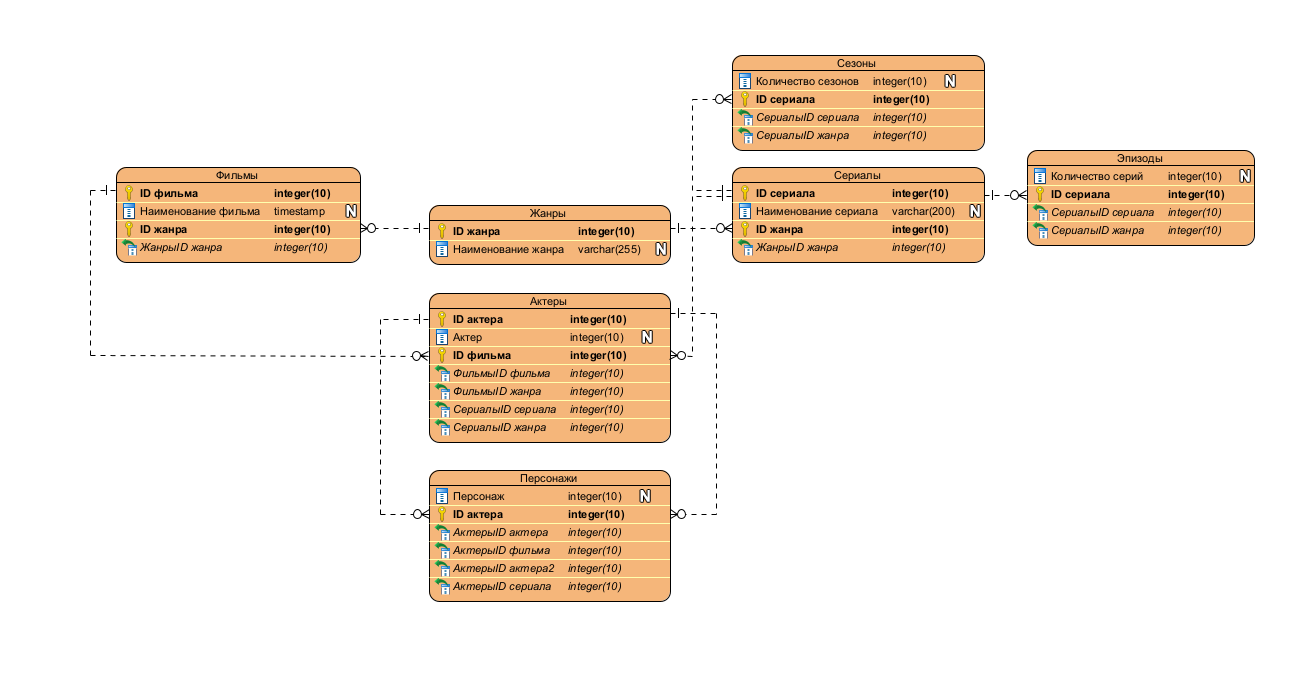

In [ ]:
table_genres.head()

,Unnamed: 0,ID жанра,Наименование жанра
0,0,28,Action
1,1,12,Adventure
2,2,16,Animation
3,3,35,Comedy
4,4,80,Crime


In [ ]:
table_film.head()

,Unnamed: 0,ID фильма,Наименование фильма,ID жанра
0,0,25074,奇蹟,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name..."
1,1,313721,Tendrement vache,"[{'id': 35, 'name': 'Comedy'}]"
2,2,392252,Mariupolis,"[{'id': 99, 'name': 'Documentary'}]"
3,3,920640,En même temps,"[{'id': 35, 'name': 'Comedy'}]"
4,4,626393,The Sleepover,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '..."


In [ ]:
table_tv.head()

,Unnamed: 0,ID сериала,Наименование сериала,ID жанра
0,0,120233,Linked Hospital Ward,[]
1,1,86034,Arifureta: From Commonplace to World's Strongest,"[{'id': 16, 'name': 'Animation'}, {'id': 10759..."
2,2,9495,D.C.,"[{'id': 18, 'name': 'Drama'}]"
3,3,308,Morangos com Açúcar,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."
4,4,97395,Soushisouai Note The Animation,"[{'id': 16, 'name': 'Animation'}]"


In [ ]:
table_seasons.head()

,Unnamed: 0,Количество сезонов,ID сериала
0,0,1,120233
1,1,2,86034
2,2,1,9495
3,3,9,308
4,4,1,97395


In [ ]:
table_episodes.head()

,Unnamed: 0,Количество серий,ID сериала
0,0,2.0,120233
1,1,25.0,86034
2,2,5.0,9495
3,3,1.0,308
4,4,2.0,97395


In [ ]:
table_acter.head()

,Unnamed: 0,Актеры,ID актера,ID фильма/сериала
0,0,Jackie Chan,52fe44b7c3a368484e032e05,25074
1,1,Anita Mui,52fe44b7c3a368484e032e01,25074
2,2,Gua Ah-leh,52fe44b7c3a368484e032e09,25074
3,3,Richard Ng,5483e4cf9251416e78009d7c,25074
4,4,Ko Chun-Hsiung,59f2e343925141223b00a265,25074


In [ ]:
table_character.head()

,Unnamed: 0,Персонажи,ID актера,ID фильма/сериала
0,0,Kuo Chen-Wah,52fe44b7c3a368484e032e05,25074
1,1,Yang Luming / Rose,52fe44b7c3a368484e032e01,25074
2,2,Madam Kao,52fe44b7c3a368484e032e09,25074
3,3,Chief inspector Ho,5483e4cf9251416e78009d7c,25074
4,4,Tiger Lo,59f2e343925141223b00a265,25074
